In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
pitches = pd.read_csv('/TM24Szn(in).csv')
pitches.head()

<ipython-input-5-7603aeb831f0>:1: DtypeWarning: Columns (1,2,5,8,9,11,12,13,15,21,22,23,24,27,28,29,35,70,71,72,73,74,75,76,87,88,89,90,91,92,93,96,97,99,100,101,161,162,163,164,165,166,167,168,169) have mixed types. Specify dtype option on import or set low_memory=False.
  pitches = pd.read_csv('/TM24Szn(in).csv')


,PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,PitcherTeam,Batter,...,ThrowTrajectoryZc2,PitchReleaseConfidence,PitchLocationConfidence,PitchMovementConfidence,HitLaunchConfidence,HitLandingConfidence,CatcherThrowCatchConfidence,CatcherThrowReleaseConfidence,CatcherThrowLocationConfidence,Umpire
0,1.0,2/16/2024,12:06:03,1.0,1.0,"Scott, Matt",1.000110e+09,Right,STA_CAR,"Guzman, Moises",...,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN,"Letendre, Scott"
1,2.0,2/16/2024,12:06:22,1.0,2.0,"Scott, Matt",1.000110e+09,Right,STA_CAR,"Guzman, Moises",...,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN,"Letendre, Scott"
2,3.0,2/16/2024,12:06:42,1.0,3.0,"Scott, Matt",1.000110e+09,Right,STA_CAR,"Guzman, Moises",...,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN,"Letendre, Scott"
3,4.0,2/16/2024,12:07:03,1.0,4.0,"Scott, Matt",1.000110e+09,Right,STA_CAR,"Guzman, Moises",...,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN,"Letendre, Scott"
4,5.0,2/16/2024,12:07:30,1.0,5.0,"Scott, Matt",1.000110e+09,Right,STA_CAR,"Guzman, Moises",...,10.19338,High,High,High,NaN,NaN,High,High,High,"Letendre, Scott"


In [ ]:
print(pitches.iloc[:, 30:48])

       RelSpeed  VertRelAngle  HorzRelAngle     SpinRate    SpinAxis  \
0      96.20922     -4.084792     -4.071401  2268.658060  216.280195   
1      96.21485     -5.792007     -2.220405  2334.641641  190.906502   
2      95.92015     -5.154999     -4.299468  2265.209732  186.463899   
3      96.42390     -4.758529     -3.385030  2311.385090  211.593144   
4      87.53001     -2.475565     -2.979733  2451.920992  136.690584   
...         ...           ...           ...          ...         ...   
13373  87.82285     -0.892761     -1.252422  1879.686563  207.214108   
13374  74.33349      2.515092     -0.247229  2212.235127   39.019661   
13375  74.68235      2.671510      1.527692  1995.875496   37.378738   
13376  83.17848     -2.913566     -2.957125  1241.657548  237.422224   
13377  74.67061      0.795554      0.025005  2023.903371   50.847392   

           Tilt  RelHeight  RelSide  Extension  VertBreak  InducedVertBreak  \
0       1:15:00    6.72869  2.76020    6.06757   -8.2096

In [ ]:
x = pitches.iloc[:, 30:48].join(pitches.iloc[:, 7])
x = x.drop(['Tilt'], axis=1)
x.head()

,RelSpeed,VertRelAngle,HorzRelAngle,SpinRate,SpinAxis,RelHeight,RelSide,Extension,VertBreak,InducedVertBreak,HorzBreak,PlateLocHeight,PlateLocSide,ZoneSpeed,VertApprAngle,HorzApprAngle,ZoneTime,PitcherThrows
0,96.20922,-4.084792,-4.071401,2268.658060,216.280195,6.72869,2.76020,6.06757,-8.20965,22.34300,15.57887,2.24843,0.28434,86.79584,-5.747784,-1.276467,0.397828,Right
1,96.21485,-5.792007,-2.220405,2334.641641,190.906502,6.74406,2.51467,5.89993,-2.69103,28.08383,5.19268,1.12041,0.88507,86.90949,-6.456855,-1.290362,0.399272,Right
2,95.92015,-5.154999,-4.299468,2265.209732,186.463899,6.67485,2.50901,6.31354,-3.35803,27.23017,2.95685,1.62034,-1.21238,86.52437,-5.946153,-3.767805,0.398060,Right
3,96.42390,-4.758529,-3.385030,2311.385090,211.593144,6.81015,2.59010,6.12612,-7.18264,23.26509,13.60426,1.79500,0.59104,86.79806,-6.239006,-0.939211,0.397145,Right
4,87.53001,-2.475565,-2.979733,2451.920992,136.690584,6.60601,2.71327,5.71271,-33.44525,4.05256,-2.52209,1.50809,-0.27535,79.19205,-8.628554,-3.430683,0.440732,Right


In [ ]:
xL = x[x['PitcherThrows'] == 'Left']
xR = x[x['PitcherThrows'] == 'Right']


xL = xL.drop(columns=['PitcherThrows'])
xR = xR.drop(columns=['PitcherThrows'])

print(xL.head)
print(xR.head)

<bound method NDFrame.head of        RelSpeed  VertRelAngle  HorzRelAngle     SpinRate    SpinAxis  \
196    86.92962     -1.810952      4.093670  2406.010677  155.123157   
197    87.13393     -2.401319      1.341207  2362.526703  150.644103   
198    79.56142     -0.799569      3.786190  1626.752654  131.930708   
199    88.28407     -2.093547      1.473576  2456.212780  144.202947   
200    89.13746     -2.867552      1.791831  2513.887555  142.344232   
...         ...           ...           ...          ...         ...   
13249  74.25974     -1.847457      3.153397  1907.918617  114.027510   
13250  74.94489     -0.156689      2.697150  1838.712513  112.144143   
13251  83.23918     -3.064927      1.175573  1847.383554  139.353071   
13252  66.99047      3.522926      0.729509  1948.497504  327.203628   
13253  83.90483     -1.157778      1.525522  1928.380849  130.092098   

       RelHeight  RelSide  Extension  VertBreak  InducedVertBreak  HorzBreak  \
196      6.25688 -1.34434

In [ ]:
y = pitches.iloc[:, 19].astype('category').cat.codes
y = pd.DataFrame({'target': y, 'PitcherThrows': pitches.iloc[:, 7]})


yL = y[y['PitcherThrows'] == 'Left']
yR = y[y['PitcherThrows'] == 'Right']


yL = yL.drop(columns=['PitcherThrows'])
yR = yR.drop(columns=['PitcherThrows'])
print(yL.head)
print(yR.head)

<bound method NDFrame.head of        target
196         3
197         3
198         0
199         3
200         3
...       ...
13249       0
13250       0
13251       3
13252       1
13253       3

[3636 rows x 1 columns]>
<bound method NDFrame.head of        target
0           3
1           3
2           3
3           3
4           6
...       ...
13373       3
13374       3
13375       1
13376       0
13377       1

[9742 rows x 1 columns]>


In [ ]:
names = pitches.iloc[:, 19].astype('category')

# Get the codes from the categorical variable
codes = names.cat.codes

# Print the category mapping
category_mapping = {code: category for code, category in zip(range(len(names.cat.categories)), names.cat.categories)}
print(category_mapping)

{0: 'ChangeUp', 1: 'Curveball', 2: 'Cutter', 3: 'Fastball', 4: 'Other', 5: 'Sinker', 6: 'Slider', 7: 'Splitter'}


In [ ]:
from sklearn.model_selection import GridSearchCV


x_train_left, x_test_left, y_train_left, y_test_left = train_test_split(xL, yL, test_size=0.2, random_state=42)
x_train_right, x_test_right, y_train_right, y_test_right = train_test_split(xR, yR, test_size=0.2, random_state=42)

rf_left = RandomForestRegressor(random_state=42)
rf_right = RandomForestRegressor(random_state=42)

rf_param_grid = {
    'n_estimators': [100,300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None,10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

left_grid = GridSearchCV(estimator=rf_left, param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=2)
right_grid = GridSearchCV(estimator=rf_right, param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=2)

left_grid.fit(x_train_left, y_train_left.values.ravel())
right_grid.fit(x_train_right, y_train_right.values.ravel())

print("MSE for Left Data:")
print(mean_squared_error(y_test_left, left_grid.predict(x_test_left)))
print("MSE for Right Data:")
print(mean_squared_error(y_test_right, right_grid.predict(x_test_right)))
print("R2 Score for Left Data:")
print(r2_score(y_test_left, left_grid.predict(x_test_left)))
print("R2 Score for Right Data:")
print(r2_score(y_test_right, right_grid.predict(x_test_right)))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
MSE for Left Data:
0.3989636599511599
MSE for Right Data:
0.7983880850578645
R2 Score for Left Data:
0.8956601165975381
R2 Score for Right Data:
0.7796753189122916


Text(0.5, 1.0, 'Actual vs. Predicted Values for Left Data')

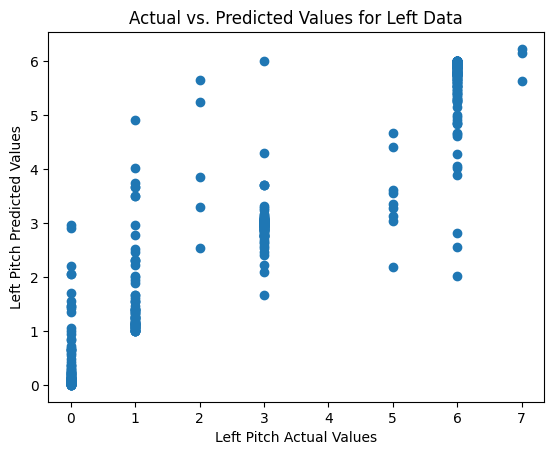

In [ ]:
plt.scatter(y_test_left, left_grid.predict(x_test_left))
plt.xlabel('Left Pitch Actual Values')
plt.ylabel('Left Pitch Predicted Values')
plt.title('Actual vs. Predicted Values for Left Data')


Text(0.5, 1.0, 'Actual vs. Predicted Values for Right Data')

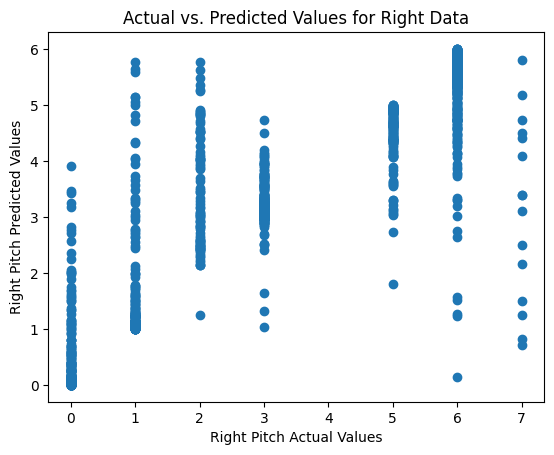

In [ ]:
plt.scatter(y_test_right, right_grid.predict(x_test_right))
plt.xlabel('Right Pitch Actual Values')
plt.ylabel('Right Pitch Predicted Values')
plt.title('Actual vs. Predicted Values for Right Data')


In [ ]:
import pickle

with open('left_model.pkl', 'wb') as file:
    pickle.dump(left_grid, file)

with open('right_model.pkl', 'wb') as file:
    pickle.dump(right_grid, file)

files.download('left_model.pkl')
files.download('right_model.pkl')
#

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>